In [ ]:
from google.colab import files

uploaded = files.upload()

for filename, file_content in uploaded.items():
    print(f'Uploaded {filename} with length {len(file_content)} bytes')

Saving Gujarat(2014-22).csv to Gujarat(2014-22).csv
Uploaded Gujarat(2014-22).csv with length 238 bytes


In [ ]:
import pandas as pd
df=pd.read_csv('Gujarat(2014-22).csv')
df.head(5)

,Year,Primary,Upper Primary,Secondary
0,2014,4.67,3.13,14.54
1,2015,0.76,5.55,21.61
2,2016,4.13,4.03,17.06
3,2017,6.35,5.68,22.13
4,2018,3.51,5.02,18.93


              Year  Primary Dropout Rate  Upper Primary Dropout Rate  \
count     9.000000              9.000000                    9.000000   
mean   2018.000000              3.062222                    3.997778   
std       2.738613              2.011348                    1.294158   
min    2014.000000              0.760000                    2.270000   
25%    2016.000000              1.450000                    3.020000   
50%    2018.000000              3.510000                    4.030000   
75%    2020.000000              4.450000                    5.020000   
max    2022.000000              6.350000                    5.680000   

       Secondary Dropout Rate  
count                9.000000  
mean                17.212222  
std                  3.290432  
min                 12.610000  
25%                 14.540000  
50%                 17.060000  
75%                 18.930000  
max                 22.130000  


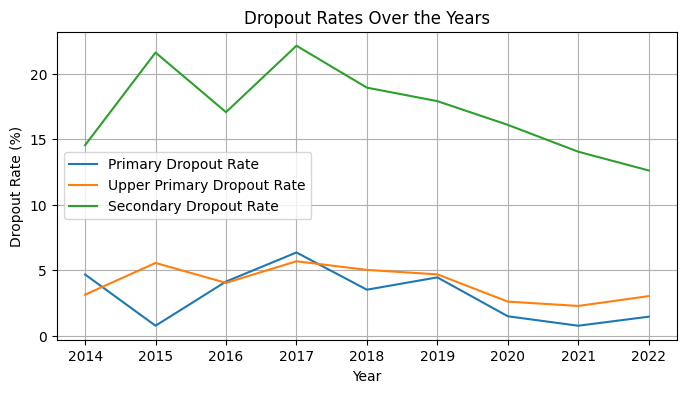

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Create a DataFrame from the provided dropout rate data
data = {
    'Year': [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    'Primary Dropout Rate': [4.67, 0.76, 4.13, 6.35, 3.51, 4.45, 1.48, 0.76, 1.45],
    'Upper Primary Dropout Rate': [3.13, 5.55, 4.03, 5.68, 5.02, 4.68, 2.6, 2.27, 3.02],
    'Secondary Dropout Rate': [14.54, 21.61, 17.06, 22.13, 18.93, 17.9, 16.09, 14.04, 12.61]
}

df = pd.DataFrame(data)

# Descriptive statistics
desc_stats = df.describe()
print(desc_stats)

# Data visualization
plt.figure(figsize=(8, 4))
plt.plot(df['Year'], df['Primary Dropout Rate'], label='Primary Dropout Rate')
plt.plot(df['Year'], df['Upper Primary Dropout Rate'], label='Upper Primary Dropout Rate')
plt.plot(df['Year'], df['Secondary Dropout Rate'], label='Secondary Dropout Rate')
plt.xlabel('Year')
plt.ylabel('Dropout Rate (%)')
plt.title('Dropout Rates Over the Years')
plt.legend()
plt.grid(True)
plt.show()





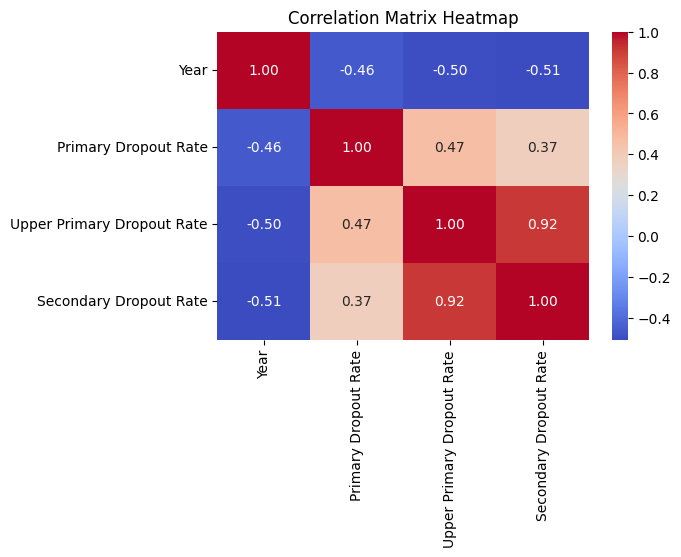

In [ ]:
# Correlation analysis
import seaborn as sns
correlation_matrix = df.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

## Linear Regression to predict the dropout rates.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import plotly.express as px

# Sample dataset (replace this with your actual dataset)
data = {
    'Year': [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    'Primary Dropout Rate': [4.67, 0.76, 4.13, 6.35, 3.51, 4.45, 1.48, 0.76, 1.45],
    'Upper Primary Dropout Rate': [3.13, 5.55, 4.03, 5.68, 5.02, 4.68, 2.6, 2.27, 3.02],
    'Secondary Dropout Rate': [14.54, 21.61, 17.06, 22.13, 18.93, 17.9, 16.09, 14.04, 12.61]
}
df = pd.DataFrame(data)

# Prepare data for extended future years (predict for 10 years)
future_years = [2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032]  # Adjust as needed
future_data = pd.DataFrame({'Year': future_years})

# Split the data into training and testing sets
X = df[['Year']]
y = df['Primary Dropout Rate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict for the future years
future_predictions = model.predict(future_data[['Year']])

# Combine the observed and predicted data
observed_and_predicted = df.append(pd.DataFrame({'Year': future_years, 'Primary Dropout Rate': future_predictions}), ignore_index=True)

# Create an interactive Plotly line chart
fig = px.line(observed_and_predicted, x='Year', y='Primary Dropout Rate', labels={'Primary Dropout Rate': 'Dropout Rate (%)'}, title='Primary Dropout Rate Predictions')
fig.add_scatter(x=future_data['Year'], y=future_predictions, mode='markers', name='Predicted', marker=dict(color='red', symbol='x'))
fig.show()

# Print the predictions for extended future years
print("Predictions for Extended Future Years:")
for year, prediction in zip(future_years, future_predictions):
    print(f"Year {year}: Predicted Dropout Rate for Primary Students = {prediction:.2f}")

# Calculate and print evaluation metrics for the model
mse = mean_squared_error(y_test, model.predict(X_test))
r2 = r2_score(y_test, model.predict(X_test))

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')



<ipython-input-66-c6258b3b446f>:35: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Predictions for Extended Future Years:
Year 2023: Predicted Dropout Rate for Primary Students = 1.33
Year 2024: Predicted Dropout Rate for Primary Students = 0.85
Year 2025: Predicted Dropout Rate for Primary Students = 0.37
Year 2026: Predicted Dropout Rate for Primary Students = -0.10
Year 2027: Predicted Dropout Rate for Primary Students = -0.58
Year 2028: Predicted Dropout Rate for Primary Students = -1.06
Year 2029: Predicted Dropout Rate for Primary Students = -1.54
Year 2030: Predicted Dropout Rate for Primary Students = -2.02
Year 2031: Predicted Dropout Rate for Primary Students = -2.50
Year 2032: Predicted Dropout Rate for Primary Students = -2.97
Mean Squared Error: 10.82
R-squared: 0.00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import plotly.express as px

# Sample dataset (replace this with your actual dataset)
data = {
    'Year': [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    'Primary Dropout Rate': [4.67, 0.76, 4.13, 6.35, 3.51, 4.45, 1.48, 0.76, 1.45],
    'Upper Primary Dropout Rate': [3.13, 5.55, 4.03, 5.68, 5.02, 4.68, 2.6, 2.27, 3.02],
    'Secondary Dropout Rate': [14.54, 21.61, 17.06, 22.13, 18.93, 17.9, 16.09, 14.04, 12.61]
}
df = pd.DataFrame(data)

# Prepare data for extended future years (predict for 10 years)
future_years = [2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032]  # Adjust as needed
future_data = pd.DataFrame({'Year': future_years})

# Split the data into training and testing sets
X = df[['Year']]
y = df['Upper Primary Dropout Rate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict for the future years
future_predictions = model.predict(future_data[['Year']])

# Combine the observed and predicted data
observed_and_predicted = df.append(pd.DataFrame({'Year': future_years, 'Upper Primary Dropout Rate': future_predictions}), ignore_index=True)

# Create an interactive Plotly line chart
fig = px.line(observed_and_predicted, x='Year', y='Upper Primary Dropout Rate', labels={'Upper Primary Dropout Rate': 'Dropout Rate (%)'}, title='Upper Primary Dropout Rate Predictions')
fig.add_scatter(x=future_data['Year'], y=future_predictions, mode='markers', name='Predicted', marker=dict(color='red', symbol='x'))
fig.show()

# Print the predictions for extended future years
print("Predictions for Extended Future Years:")
for year, prediction in zip(future_years, future_predictions):
    print(f"Year {year}: Predicted Dropout Rate for Upper Primary Students = {prediction:.2f}")

# Calculate and print evaluation metrics for the model
mse = mean_squared_error(y_test, model.predict(X_test))
r2 = r2_score(y_test, model.predict(X_test))

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')



<ipython-input-67-ed18a09495b5>:35: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Predictions for Extended Future Years:
Year 2023: Predicted Dropout Rate for Upper Primary Students = 3.51
Year 2024: Predicted Dropout Rate for Upper Primary Students = 3.41
Year 2025: Predicted Dropout Rate for Upper Primary Students = 3.31
Year 2026: Predicted Dropout Rate for Upper Primary Students = 3.20
Year 2027: Predicted Dropout Rate for Upper Primary Students = 3.10
Year 2028: Predicted Dropout Rate for Upper Primary Students = 3.00
Year 2029: Predicted Dropout Rate for Upper Primary Students = 2.90
Year 2030: Predicted Dropout Rate for Upper Primary Students = 2.79
Year 2031: Predicted Dropout Rate for Upper Primary Students = 2.69
Year 2032: Predicted Dropout Rate for Upper Primary Students = 2.59
Mean Squared Error: 1.79
R-squared: 0.33


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import plotly.express as px

# Sample dataset (replace this with your actual dataset)
data = {
    'Year': [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    'Primary Dropout Rate': [4.67, 0.76, 4.13, 6.35, 3.51, 4.45, 1.48, 0.76, 1.45],
    'Upper Primary Dropout Rate': [3.13, 5.55, 4.03, 5.68, 5.02, 4.68, 2.6, 2.27, 3.02],
    'Secondary Dropout Rate': [14.54, 21.61, 17.06, 22.13, 18.93, 17.9, 16.09, 14.04, 12.61]
}
df = pd.DataFrame(data)

# Prepare data for extended future years (predict for 10 years)
future_years = [2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032]  # Adjust as needed
future_data = pd.DataFrame({'Year': future_years})

# Split the data into training and testing sets
X = df[['Year']]
y = df['Secondary Dropout Rate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict for the future years
future_predictions = model.predict(future_data[['Year']])

# Combine the observed and predicted data
observed_and_predicted = df.append(pd.DataFrame({'Year': future_years, 'Secondary Dropout Rate': future_predictions}), ignore_index=True)

# Create an interactive Plotly line chart
fig = px.line(observed_and_predicted, x='Year', y='Secondary Dropout Rate', labels={'Secondary Dropout Rate': 'Dropout Rate (%)'}, title='Secondary Dropout Rate Predictions')
fig.add_scatter(x=future_data['Year'], y=future_predictions, mode='markers', name='Predicted', marker=dict(color='red', symbol='x'))
fig.show()

# Print the predictions for extended future years
print("Predictions for Extended Future Years:")
for year, prediction in zip(future_years, future_predictions):
    print(f"Year {year}: Predicted Dropout Rate for Secondary Students = {prediction:.2f}")

# Calculate and print evaluation metrics for the model
mse = mean_squared_error(y_test, model.predict(X_test))
r2 = r2_score(y_test, model.predict(X_test))

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')



<ipython-input-64-19acfd78dc50>:35: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Predictions for Extended Future Years:
Year 2023: Predicted Dropout Rate for Secondary Students = 15.38
Year 2024: Predicted Dropout Rate for Secondary Students = 15.05
Year 2025: Predicted Dropout Rate for Secondary Students = 14.72
Year 2026: Predicted Dropout Rate for Secondary Students = 14.39
Year 2027: Predicted Dropout Rate for Secondary Students = 14.06
Year 2028: Predicted Dropout Rate for Secondary Students = 13.73
Year 2029: Predicted Dropout Rate for Secondary Students = 13.40
Year 2030: Predicted Dropout Rate for Secondary Students = 13.07
Year 2031: Predicted Dropout Rate for Secondary Students = 12.74
Year 2032: Predicted Dropout Rate for Secondary Students = 12.41
Mean Squared Error: 8.42
R-squared: 0.41


## Time Series Analysis

In [ ]:
import pandas as pd

data = {
    'Year': [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    'Primary Dropout Rate': [4.67, 0.76, 4.13, 6.35, 3.51, 4.45, 1.48, 0.76, 1.45],
    'Upper Primary Dropout Rate': [3.13, 5.55, 4.03, 5.68, 5.02, 4.68, 2.6, 2.27, 3.02],
    'Secondary Dropout Rate': [14.54, 21.61, 17.06, 22.13, 18.93, 17.9, 16.09, 14.04, 12.61]
}

df = pd.DataFrame(data)
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df.set_index('Year', inplace=True)


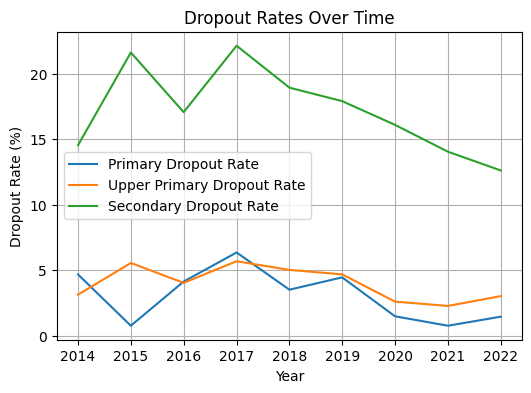

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(df.index, df['Primary Dropout Rate'], label='Primary Dropout Rate')
plt.plot(df.index, df['Upper Primary Dropout Rate'], label='Upper Primary Dropout Rate')
plt.plot(df.index, df['Secondary Dropout Rate'], label='Secondary Dropout Rate')
plt.xlabel('Year')
plt.ylabel('Dropout Rate (%)')
plt.title('Dropout Rates Over Time')
plt.legend()
plt.grid(True)
plt.show()


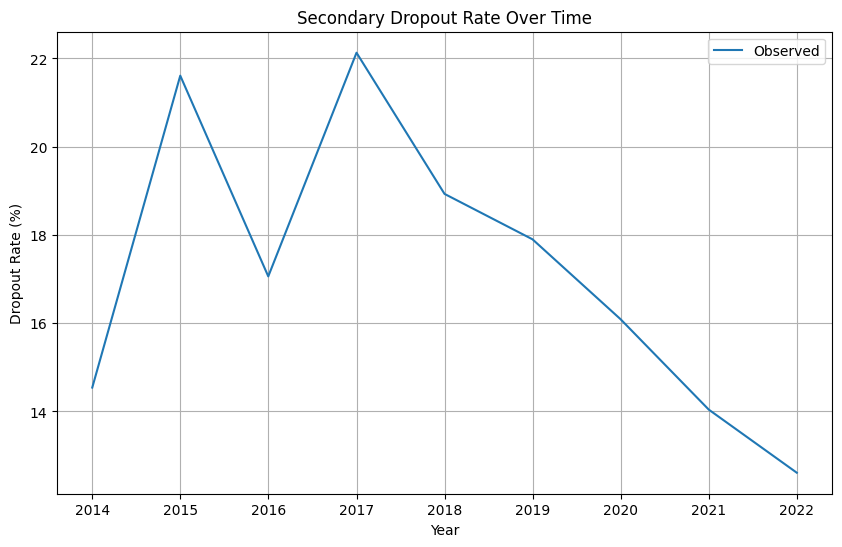

ADF Statistic: -0.4131657124586304
p-value: 0.90787725855221
Is the time series stationary?
Critical Values: {'1%': -5.354256481481482, '5%': -3.6462381481481483, '10%': -2.901197777777778}


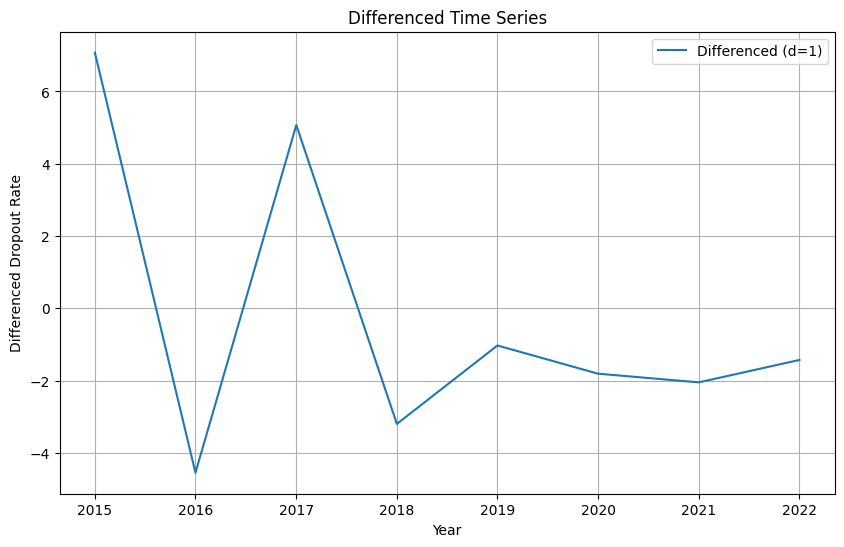

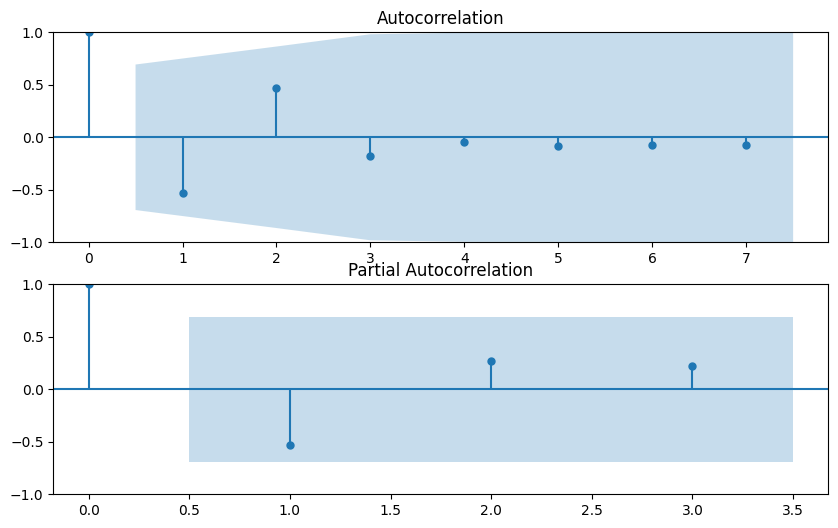

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


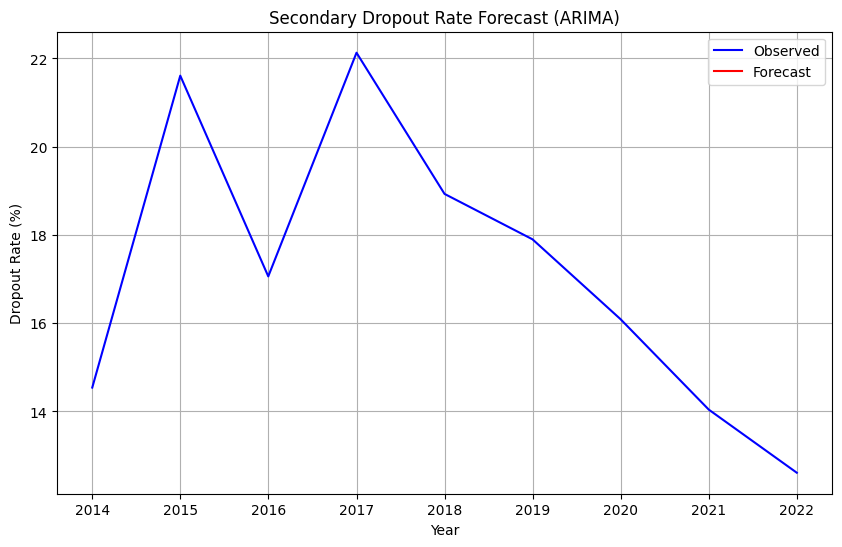

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
# Load and prepare data
data = {
    'Year': [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    'Secondary Dropout Rate': [14.54, 21.61, 17.06, 22.13, 18.93, 17.9, 16.09, 14.04, 12.61]
}

df = pd.DataFrame(data)
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df.set_index('Year', inplace=True)

# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Secondary Dropout Rate'], label='Observed')
plt.xlabel('Year')
plt.ylabel('Dropout Rate (%)')
plt.title('Secondary Dropout Rate Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Check stationarity using ADF test
adf_result = adfuller(df['Secondary Dropout Rate'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print('Is the time series stationary?')
print(f'Critical Values: {adf_result[4]}')

# Differencing to make the time series stationary
d = 1  # Order of differencing
df_diff = df.diff(periods=d).dropna()

# Plot the differenced time series
plt.figure(figsize=(10, 6))
plt.plot(df_diff.index, df_diff['Secondary Dropout Rate'], label=f'Differenced (d={d})')
plt.xlabel('Year')
plt.ylabel('Differenced Dropout Rate')
plt.title('Differenced Time Series')
plt.legend()
plt.grid(True)
plt.show()

# Plot ACF and PACF for parameter selection
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))
plot_acf(df_diff['Secondary Dropout Rate'], ax=ax1, lags=7)
plot_pacf(df_diff['Secondary Dropout Rate'], ax=ax2, lags=3)  # Reduce lags to 3
plt.show()


# Choose ARIMA model parameters
p = 1  # AR order
q = 1  # MA order

# Fit ARIMA model
model = ARIMA(df_diff, order=(p, d, q))
results = model.fit()

# Forecast future values
forecast_steps = 5  # Adjust as needed
# Forecast future values
forecast = results.forecast(steps=forecast_steps)


# Invert differencing to obtain actual forecasts
forecast_actual = np.cumsum(forecast)

# Create an index for the forecasted values
forecast_actual_index = pd.date_range(start=df.index[-1], periods=len(forecast_actual) + 1, freq='Y')

# Create a DataFrame for the forecasts
forecast_df = pd.DataFrame({'Secondary Dropout Rate Forecast': forecast_actual}, index=forecast_actual_index[1:])

# Concatenate the forecasts with the original DataFrame
df_forecasted = pd.concat([df, forecast_df])

# Plot the original data and the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(df_forecasted.index, df_forecasted['Secondary Dropout Rate'], label='Observed', color='blue')

# Plot the forecasted values separately
plt.plot(forecast_df.index, forecast_df['Secondary Dropout Rate Forecast'], label='Forecast', color='red')

plt.xlabel('Year')
plt.ylabel('Dropout Rate (%)')
plt.title('Secondary Dropout Rate Forecast (ARIMA)')
plt.legend()
plt.grid(True)
plt.show()






In [ ]:
# Debugging code to print forecasted values and index
print("Forecasted Values:")
print(forecast_actual)
print("\nIndex for Forecasted Values:")
print(forecast_actual_index)


Forecasted Values:
2023-01-01   -2.027998
2024-01-01   -3.511024
2025-01-01   -5.490698
2026-01-01   -7.017763
2027-01-01   -8.957303
Freq: AS-JAN, Name: predicted_mean, dtype: float64

Index for Forecasted Values:
DatetimeIndex(['2022-12-31', '2023-12-31', '2024-12-31', '2025-12-31',
               '2026-12-31', '2027-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')


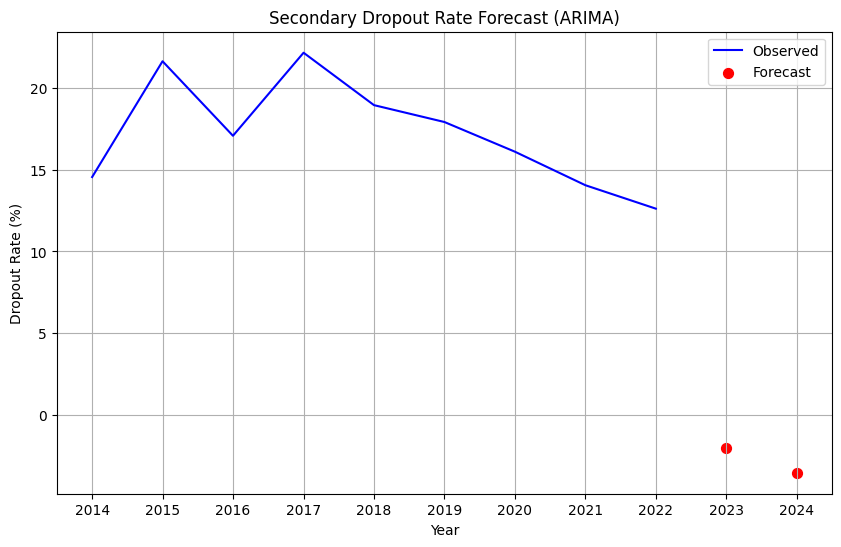

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample data
data = {
    'Year': [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    'Secondary Dropout Rate': [14.54, 21.61, 17.06, 22.13, 18.93, 17.9, 16.09, 14.04, 12.61]
}

df = pd.DataFrame(data)
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df.set_index('Year', inplace=True)

# Plot the original data
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Secondary Dropout Rate'], label='Observed', color='blue')

# Add a simple forecasted value
forecast_date = pd.to_datetime('2023-01-01')
forecast_value = -2.027998
plt.scatter(forecast_date, forecast_value, label='Forecast', color='red', marker='o', s=50)

forecast_date = pd.to_datetime('2024-01-01')
forecast_value = -3.511024
plt.scatter(forecast_date, forecast_value, color='red', marker='o', s=50)


plt.xlabel('Year')
plt.ylabel('Dropout Rate (%)')
plt.title('Secondary Dropout Rate Forecast (ARIMA)')
plt.legend()
plt.grid(True)
plt.show()
